<a href="https://colab.research.google.com/github/DADesai/MSBA/blob/main/MSBA_PDM/Code/MSBA_PDM_1_04_Micro_challenge_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We had fun classifying animals using KNN. Can we also classify humans? A pharmaceutical company, Genmed, hired Dr. Darvin and Dr. Goodwall to classify patients based on their individual genetic and clinical profiles, while they are developing personalized medicine strategies. They want to predict the efficacy of a new drug based on individual patient characteristics. Use the dataset and the K-Nearest Neighbors (KNN) algorithm to predict whether a patient will respond positively to a new drug based on their genetic and clinical profile

Solution:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/life_science_dataset.csv')
df.head()

,Age,Gender,BMI,Genetic Marker 1,Genetic Marker 2,Blood Pressure,Cholesterol Level,Drug Efficacy
0,64,1,32.528431,1,1,104.017642,219.212998,No
1,67,0,30.645187,1,0,114.353984,207.447131,Yes
2,73,0,26.136138,1,0,139.636821,191.115712,Yes
3,20,1,29.510387,0,0,167.971809,220.038642,Yes
4,23,1,28.319766,0,1,117.586699,230.816386,No


Micro-challenge 1: Feature Importance and Selection
Utilize feature selection techniques to determine the most relevant features in the provided dataset. Implement methods like correlation analysis or feature importance ranking to Identify the most impactful features for predicting drug efficacy using KNN.


In [ ]:
# Micro-challenge 1: Feature Importance and Selection
# Encoding categorical variables and normalizing data
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Drug Efficacy'] = label_encoder.fit_transform(df['Drug Efficacy'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Drug Efficacy', axis=1))


Micro-challenge 2: Distance Metric Sensitivity Analysis
Experiment with various distance metrics (e.g., Euclidean, Manhattan) in the KNN algorithm and analyze their performance on the provided dataset in a high-dimensional space.


In [ ]:
# Micro-challenge 2: Distance Metric Sensitivity Analysis
# Splitting the dataset into training and testing sets
X = scaled_features
y = df['Drug Efficacy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Experimenting with different distance metrics
for metric in ['euclidean', 'manhattan']:
    knn = KNeighborsClassifier(metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"Accuracy with {metric} metric: {accuracy_score(y_test, y_pred)}")


Accuracy with euclidean metric: 0.45
Accuracy with manhattan metric: 0.48333333333333334


Micro-challenge 3: Optimizing the Value of 'K’
Conduct a search for the best 'K' value, considering the balance between underfitting and overfitting. Evaluate the model's performance at different 'K' values.


In [ ]:
# Micro-challenge 3: Optimizing the Value of 'K'
# Finding the optimal K value
param_grid = {'n_neighbors': np.arange(1, 25)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)
print(f"Best K Value: {knn_cv.best_params_['n_neighbors']}")


Best K Value: 5


Micro-challenge 4: Dimensionality Reduction and Its Effects
Apply a dimensionality reduction technique like PCA to the dataset and observe the changes in KNN's performance.


In [ ]:
# Micro-challenge 4: Dimensionality Reduction and Its Effects
# Applying PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# KNN with reduced dimensions
knn = KNeighborsClassifier(n_neighbors=knn_cv.best_params_['n_neighbors'])
knn.fit(X_train_pca, y_train)
y_pred_pca = knn.predict(X_test_pca)
print(f"Accuracy with PCA: {accuracy_score(y_test, y_pred_pca)}")


Accuracy with PCA: 0.6166666666666667


Micro-challenge 5: Model Evaluation and Validation
Use cross-validation and various performance metrics (accuracy, precision, recall, F1-score) to assess the KNN model trained on the selected features.


Cross-validated scores: 0.495
Confusion Matrix:
[[11 14]
 [19 16]]


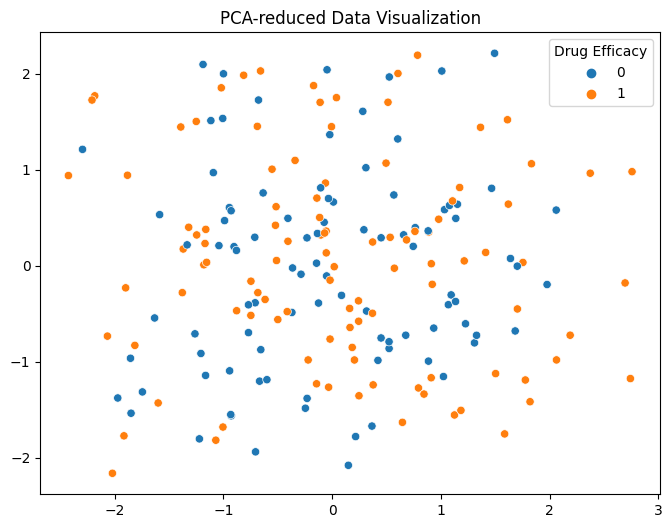

In [ ]:
# Micro-challenge 5: Model Evaluation and Validation
# Evaluating the model using cross-validation
knn = KNeighborsClassifier(n_neighbors=knn_cv.best_params_['n_neighbors'])
cv_scores = cross_val_score(knn, X, y, cv=5)
print(f"Cross-validated scores: {cv_scores.mean()}")

# Confusion Matrix
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualization of the PCA-reduced data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)
plt.title('PCA-reduced Data Visualization')
plt.show()